In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine 
import matplotlib.pyplot as plt

# Get Data

In [2]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
wine_features = X.columns

# <font color='blue'> **StandardScaler before apply PCA**</font> 

In [3]:
#⚠️ Data must be centered around their mean before apply PCA ⚠️
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=wine_features)
X_scaled.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


# <font color='green'> **Correlation**</font>  

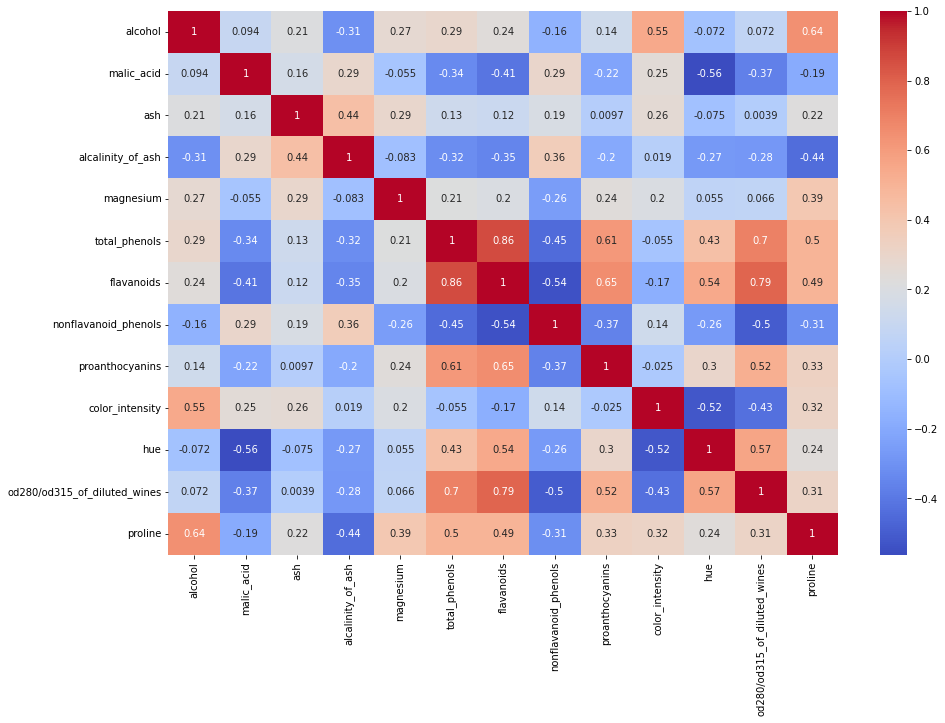

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_scaled.corr(), cmap='coolwarm', annot= True);

# Features Distribution

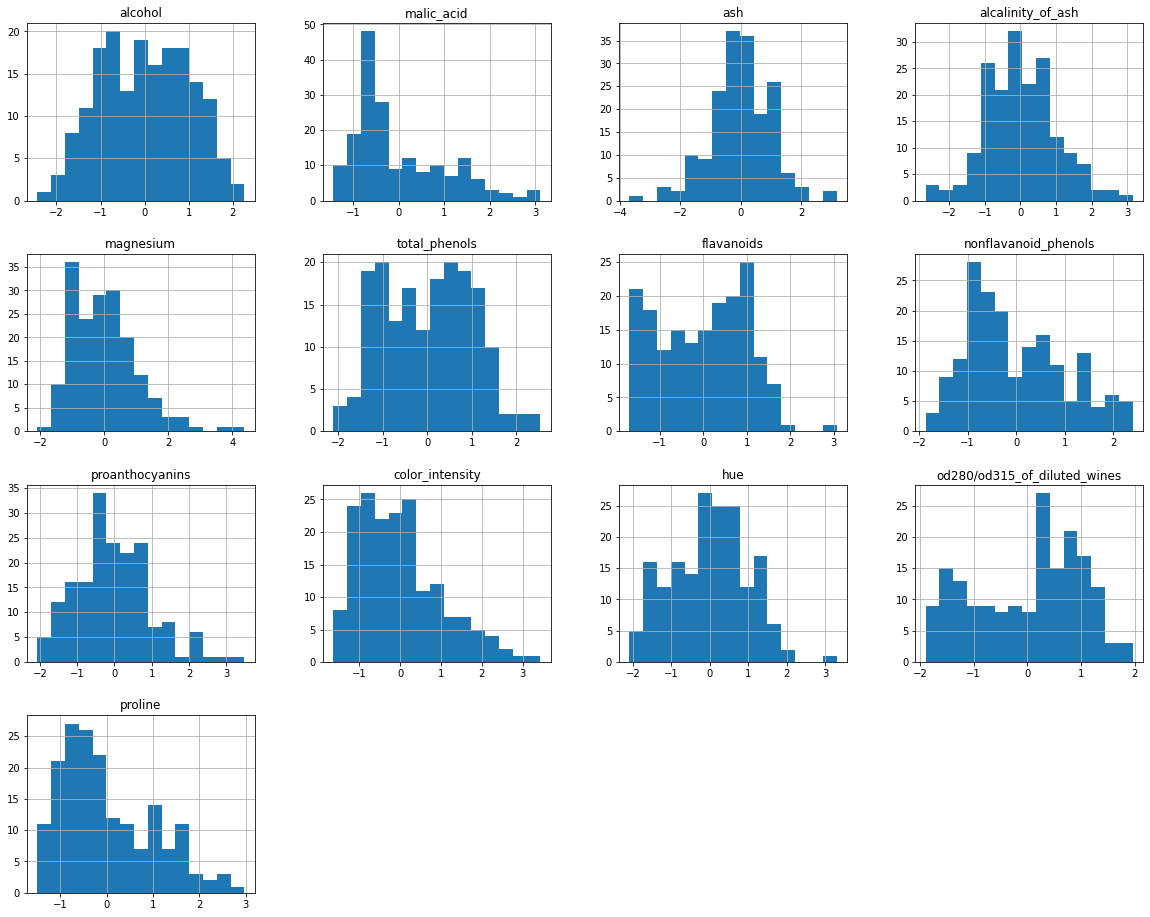

In [5]:
X_scaled.hist(figsize=(20,16),bins = 15)
plt.title("Features Distribution")
plt.show()

# Target Distribution

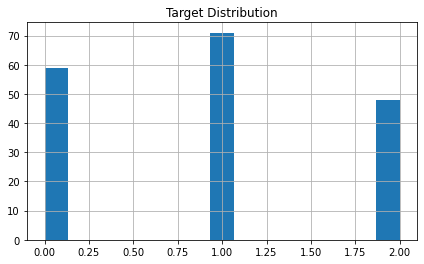

In [6]:
y.hist(figsize=(7,4),bins = 15)
plt.title("Target Distribution")
plt.show()

# <font color='red'> **Principal Components PCA**</font>  

## Compute/Fit the Principal Components PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


**Each PC is a linear combinations of initial wine features**

## **Project** dataset into a new space of PCs¶

In [8]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 14)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


## X_proj **correlation**

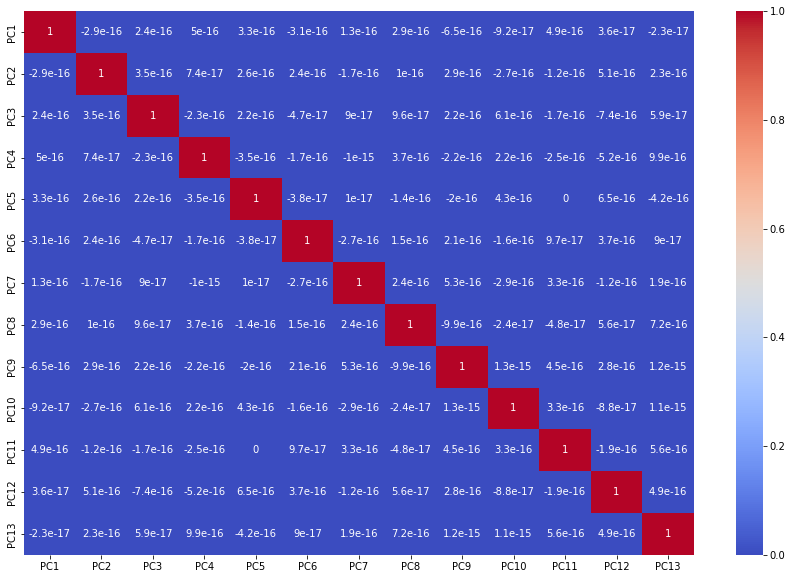

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_proj.corr(), cmap='coolwarm', annot = True);

## Visualization

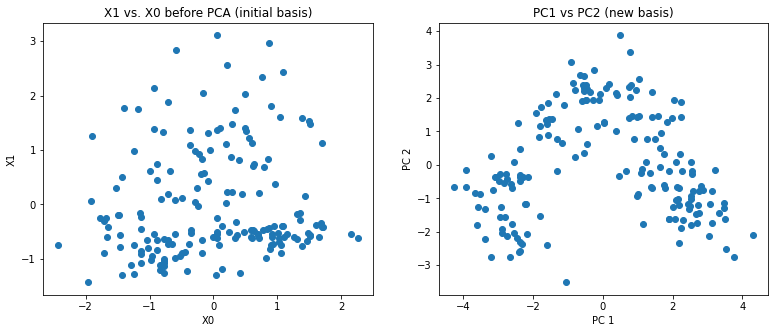

In [10]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [11]:
# computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X_scaled", X_scaled.shape)

np.allclose(
    pca.transform(X_scaled),
    np.dot(X_scaled,W)
)

Shape of W:  (13, 13)
Shape of X_scaled (178, 13)


True

In [12]:
pca.get_covariance().shape

(13, 13)

In [13]:
# Sklearn provides it automatically

explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

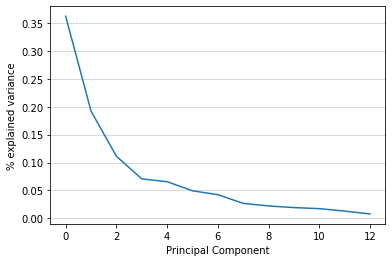

In [14]:
plt.plot(explained_variance)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance')
plt.grid(axis="y", linewidth=0.5)

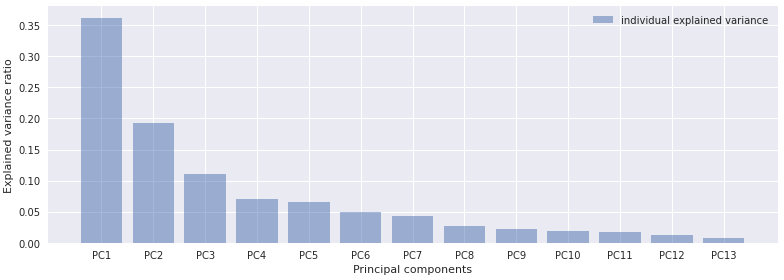

In [15]:
#wine_features = X.columns

with plt.style.context('seaborn'):
    plt.figure(figsize=(11, 4))

    plt.bar([f'PC{i}' for i in range(1, 14)], 
            explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Compute Covariance matrix

In [16]:
cov_mat = np.cov(X_scaled.T) # equiv to : pca.get_covariance()

## Compute Eigenvectors and Eigenvalues

Obtain the Eigenvectors and Eigenvalues from the covariance matrix

(we can also use correlation matrix or even Single value decomposition, covered in seperate kernels).

In [17]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(cov_mat)


# Show all 13 principal components (unranked)
W = pd.DataFrame(eig_vecs, 
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
malic_acid,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
ash,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
alcalinity_of_ash,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
magnesium,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
total_phenols,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
flavanoids,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
nonflavanoid_phenols,0.298533,0.028779,0.170368,0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
proanthocyanins,-0.313429,0.039302,0.149454,-0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
color_intensity,0.088617,0.529996,-0.137306,-0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


## Verification

In [18]:
# Let's compute it
SUM = (X_proj.std()**2 / ((X_scaled.std()**2).sum()))
SUM

PC1     0.361988
PC2     0.192075
PC3     0.111236
PC4     0.070690
PC5     0.065633
PC6     0.049358
PC7     0.042387
PC8     0.026807
PC9     0.022222
PC10    0.019300
PC11    0.017368
PC12    0.012982
PC13    0.007952
dtype: float64

In [19]:
#N.B : Sum of 
SUM.sum()

1.0

In [20]:
# N.B : Sum of square of each value in an Eigenvector is 1. 
T = []
for i in range(cov_mat.shape[0]):
    T.append( round(np.sum(eig_vecs[i,:]**2),2) )  
T

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

## Choosing K

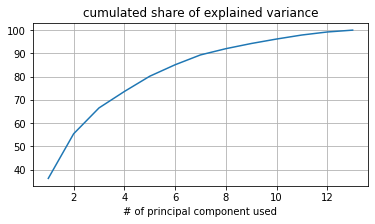

In [21]:
#explained_variance=pca.explained_variance_ratio_

cum_var_exp = np.cumsum(explained_variance)

plt.figure(figsize=(6, 3))
plt.plot(range(1, len(cum_var_exp)+1), 100*cum_var_exp)

plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used')
plt.grid();

In [22]:
cum_var_exp

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

From the plot, we can see that :

* 66% of the variance is captured within the three largest principal components. 

* 55% of the variance is captured within the two largest principal components.

Therefore, it is acceptable to choose the first 3 largest principal components to make up the projection matrix W.

**Here, k=3 looks promising**

## Construct the projection matrix with k=3 dimensions

In [23]:
# Fit a PCA with only 3 components
pca3 = PCA(n_components=3)#.fit(X_scaled)

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X_scaled), columns=['PC1', 'PC2', 'PC3'])

# We have "compressed" our dataset in 3D
X_proj3

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## Test model performance with k=3 dimensions

### LogisticRegression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

score_proj = cross_val_score(LogisticRegression(), X_proj3, y, cv=5).mean()
score = cross_val_score(LogisticRegression(), X_scaled, y, cv=5).mean()

print("accuracy 3 PCs : ", score_proj)
print("\naccuracy all 13 initial features : ", score)

accuracy 3 PCs :  0.9609523809523809

accuracy all 13 initial features :  0.9888888888888889


### KNeighborsClassifier Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

score_proj = cross_val_score(KNeighborsClassifier(), X_proj3, y, cv=5).mean()
score = cross_val_score(KNeighborsClassifier(), X_scaled, y, cv=5).mean()

print("accuracy 3 PCs : ", score_proj)
print("\naccuracy all 13 initial features : ", score)

accuracy 3 PCs :  0.961111111111111

accuracy all 13 initial features :  0.9550793650793651


## Reconstruct  X  from X_proj3

In [26]:
X_reconstructed = pca3.inverse_transform(X_proj3)
X_reconstructed.shape

(178, 13)

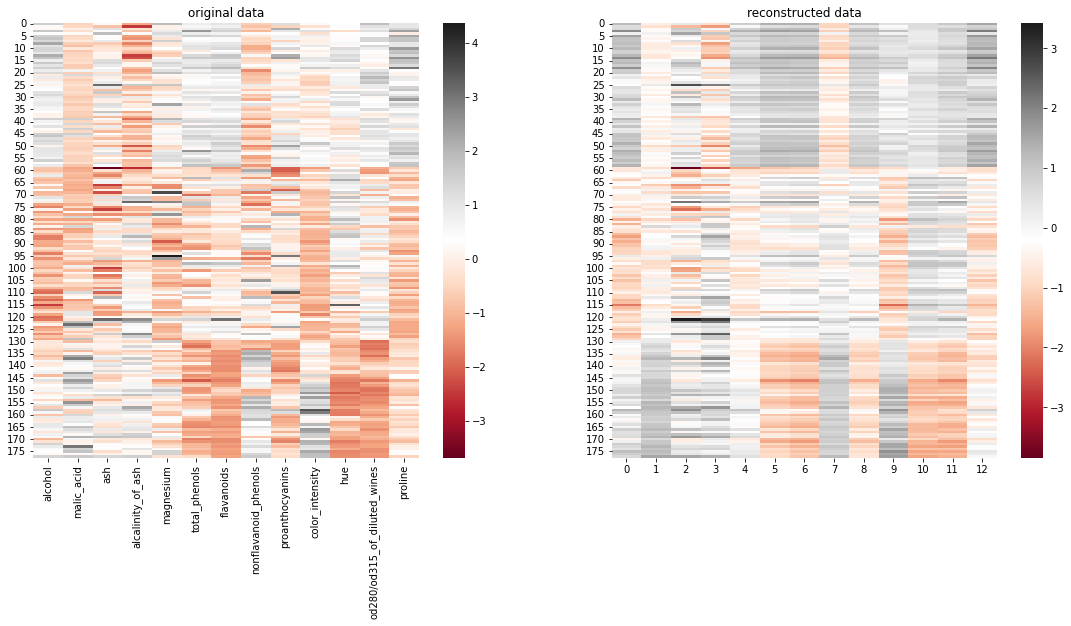

In [27]:
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
sns.heatmap(X_scaled, cmap = 'RdGy')
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed, cmap = 'RdGy');

# <font color='red'> **Kmeans**</font>

In [28]:
X_proj.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637


In [29]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
wine_features = X.columns

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=wine_features)
X_scaled.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


## Clustering with KMeans

In [30]:
# Fit a K-MEANS
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km_p = KMeans(n_clusters=3)

km.fit(X_scaled) # X_scaled is mandatory  &&&&&   There is no transformation of X for Kmeans method
km_p.fit(X_proj) # 

# The 3 centroids coordinates (expressed in the basis of PCs)
km.cluster_centers_.shape, km_p.cluster_centers_.shape

((3, 13), (3, 13))

In [35]:
pd.concat( [pd.Series(km_p.labels_), y, pd.Series(km.labels_)] , axis = 1)

,0,target,1
0,0,0,2
1,0,0,2
2,0,0,2
3,0,0,2
4,0,0,2
...,...,...,...
173,2,2,0
174,2,2,0
175,2,2,0
176,2,2,0


## Visualization

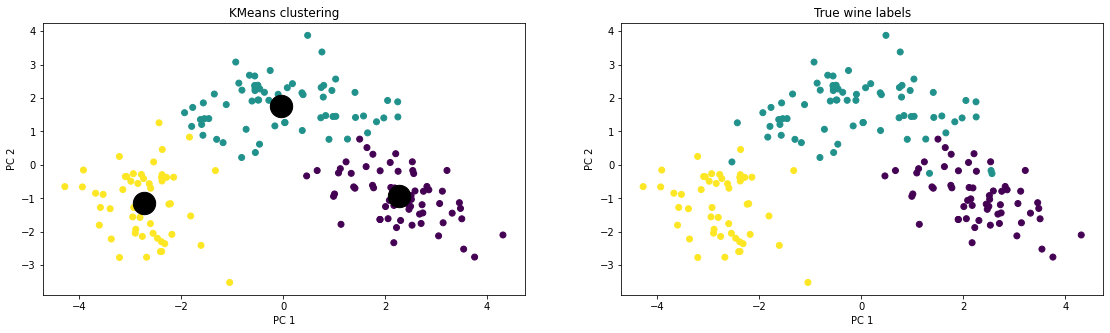

In [37]:
labels_p = pd.Series(km_p.labels_)#.map({0:2, 1:0, 2:1})

# Visualization
plt.figure(figsize=(19,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=labels_p)
centers = km_p.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

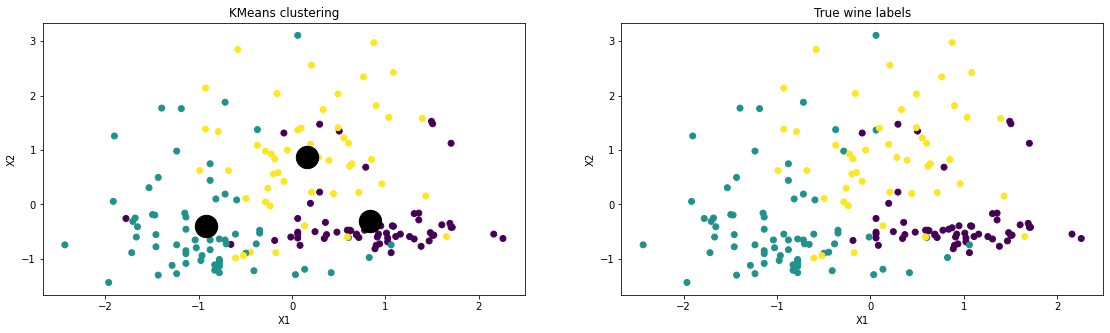

In [39]:
labels = pd.Series(km.labels_).map({0:2, 1:1, 2:0})

# Visualization
plt.figure(figsize=(19,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=labels)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.title('KMeans clustering'); plt.xlabel('X1'); plt.ylabel('X2')

plt.subplot(1,2,2)
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('X1'); plt.ylabel('X2');

## Accuracy and Predict

In [42]:
# Accuracy
from sklearn.metrics import accuracy_score
y_pred =  pd.Series(km.labels_).map({0:2, 1:1, 2:0}) # Warning: change this manually!
print("Accuracy : ", accuracy_score(y_pred, y) )

# Predict
new_X = np.random.random((1,13)) # 13 vals
km.predict(new_X)  

Accuracy :  0.9662921348314607


array([2], dtype=int32)

## Choosing hyerparameter K ?

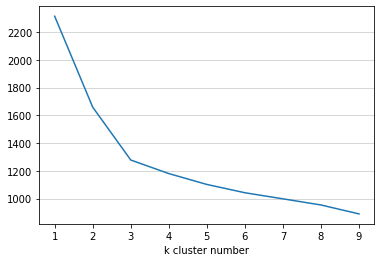

In [43]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_scaled)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')
plt.grid(axis="y", linewidth=0.5);

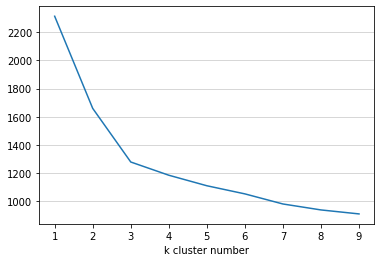

In [44]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test_p = KMeans(n_clusters=k).fit(X_proj)
    inertias.append(km_test_p.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')
plt.grid(axis="y", linewidth=0.5);

# <font color='red'> **Linear Discriminant Analysis (LDA)**</font>

In [45]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

## Get Data

In [46]:
# Import Data
iris = datasets.load_iris()
X = iris.data
y = iris.target
cibles = iris.target_names
print(cibles)

['setosa' 'versicolor' 'virginica']


In [47]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = iris['target']
df['Species'] = df['Species'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualization

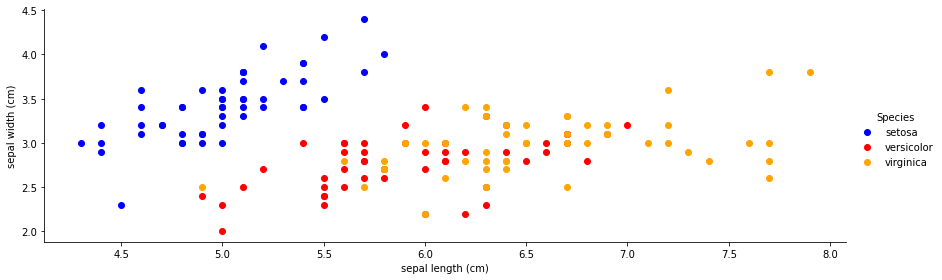

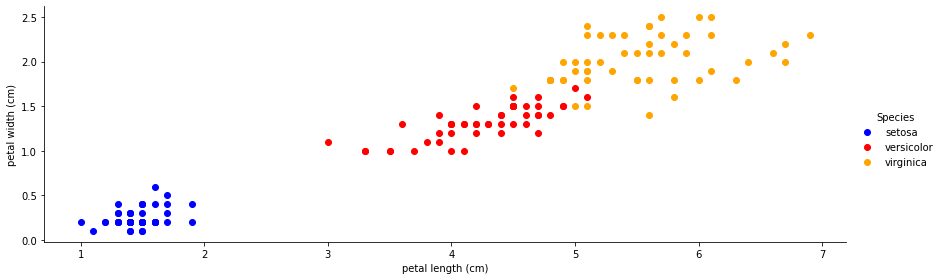

In [48]:
# Visualization

couleur = {'Setosa' : 'blue', 'Versicolor' : 'red', 'Virginica' : 'orange'}
#Voyons comment les classes sont séparées en fonction des différentes caractéristiques
g = sns.FacetGrid(df, hue = "Species", height = 4,
              palette = couleur.values(), aspect= 3)
g.map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

h = sns.FacetGrid(df, hue = "Species", height = 4,
              palette = couleur.values(), aspect= 3)
h.map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

plt.show()

## Correlation

<AxesSubplot:>

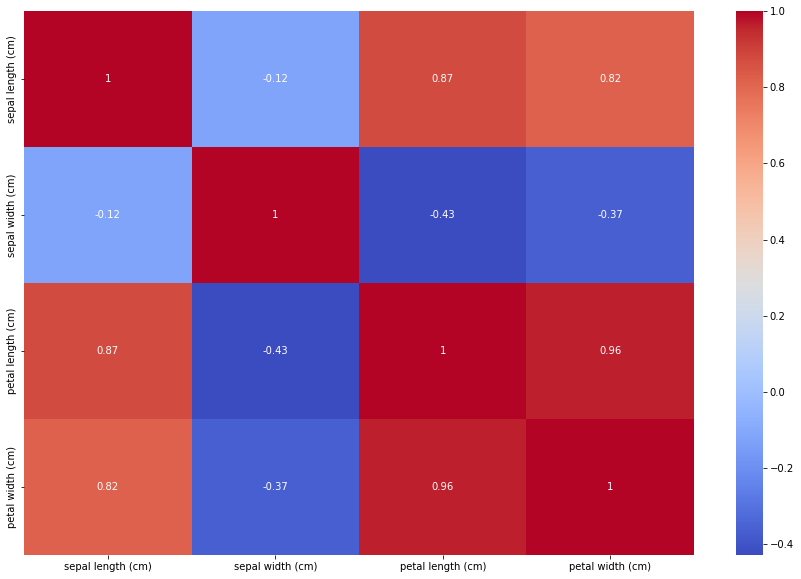

In [49]:
#creer une matrice de correlation
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), cmap='coolwarm', annot = True)

## Compute/ Fit PCA 

In [50]:
#normalisation des données en utilisant standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

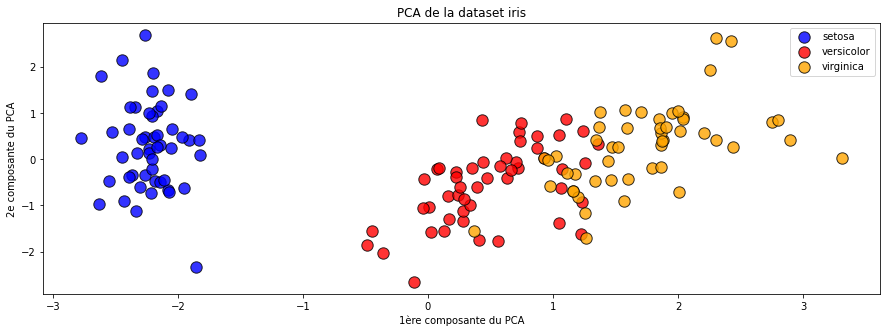

variance expliquée pour chaque composantes: [0.72962445 0.22850762]


In [51]:
#L’analyse en composantes principales PCA
pca = PCA(n_components=2)
X_reduit = pca.fit_transform(X_scaled)

couleur = {'Setosa' : 'blue', 'Versicolor' : 'red', 'Virginica' : 'orange'}
cibles = iris.target_names

plt.figure(figsize=(15, 5))
for color, i, cibles in zip(couleur.values(), [0, 1, 2], cibles):
    #print(color, i, cibles)
    plt.scatter(X_reduit[y == i, 0], X_reduit[y == i, 1], 
                color = color, alpha = .8,
                label = cibles, s = 130, edgecolors = 'k')
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.xlabel("1ère composante du PCA")
plt.ylabel("2e composante du PCA")
plt.title('PCA de la dataset iris')
plt.show()
    
# pourcentage de la variance expliquée pour chaque composantes
print('variance expliquée pour chaque composantes: %s' % str(pca.explained_variance_ratio_))

## Compute / Fit LDA 

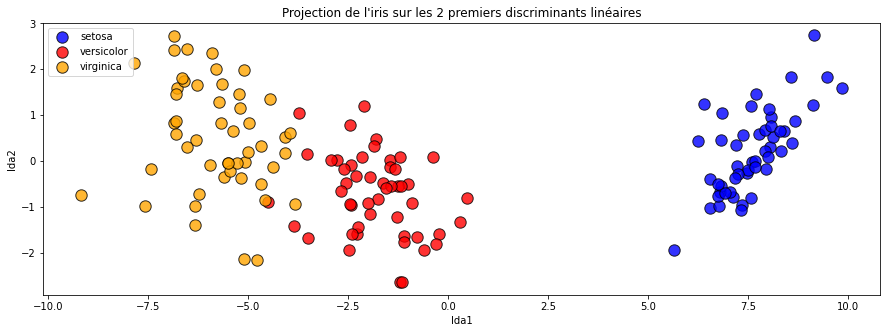

variance expliquée pour chaque composantes: [0.9912126 0.0087874]


In [54]:
couleur = {'Setosa' : 'blue','Versicolor' : 'red','Virginica' : 'orange'}
cibles = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)

#normalisation des données en utilisant standard scaler
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)

lda.fit(X_scaled, y) #lda.fit(X, y)
X_reduit = lda.transform(X_scaled)

plt.figure(figsize = (15, 5))
for color, i, cibles in zip(couleur.values(), [0, 1, 2], cibles):
    #print(color, i, cibles)
    plt.scatter(X_reduit[y == i, 0], X_reduit[y == i, 1], 
                color = color, alpha = .8,
                label = cibles, s = 130, edgecolors = 'k')
    
plt.legend(loc = "best", shadow = False, scatterpoints = 1)
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.title("Projection de l'iris sur les 2 premiers discriminants linéaires")
plt.show()

print('variance expliquée pour chaque composantes: {}'.format(lda.explained_variance_ratio_))


In [56]:
#normalisation des données en utilisant standard scaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(iris.data)

In [57]:
df = pd.DataFrame(X_sc, columns = iris.feature_names)
df['Species'] = iris['target']
df['Species'] = df['Species'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


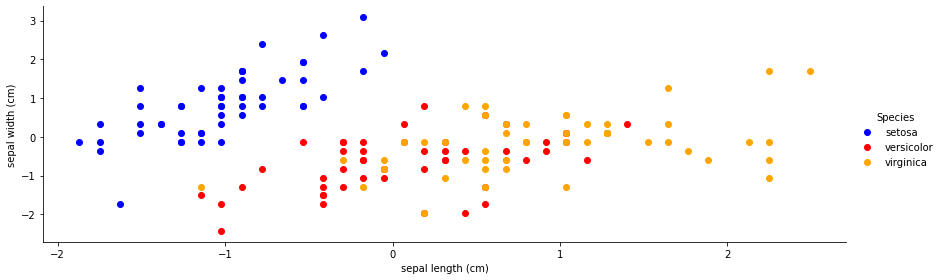

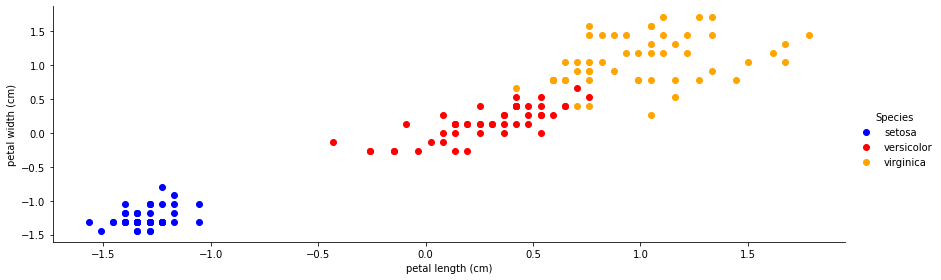

In [58]:
# Visualization

couleur = {'Setosa' : 'blue', 'Versicolor' : 'red', 'Virginica' : 'orange'}
#Voyons comment les classes sont séparées en fonction des différentes caractéristiques
g = sns.FacetGrid(df, hue = "Species", height = 4,
              palette = couleur.values(), aspect= 3)
g.map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

h = sns.FacetGrid(df, hue = "Species", height = 4,
              palette = couleur.values(), aspect= 3)
h.map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

plt.show()